# Customer segmentation using unsupervised machine learning

## I-Importing the data set and data exploration

### 1-Getting data

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

df=pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2-Data cleaning

In [5]:
#Shape of our data set
shape=df.shape
print(f'Our data set has {shape[0]} rows and {shape[1]} columns')


Our data set has 541909 rows and 8 columns


#### a-Data types

In [16]:
# Data types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
print(df['InvoiceNo'].unique()[:10]) 

['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']


In [81]:
# Changing the data type of 'invoice number' and 'invoice date'

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['InvoiceNo']=df['InvoiceNo'].astype(str)


C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_5260\3309118241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], errors='coerce')
C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_5260\3309118241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo']=df['InvoiceNo'].astype(str)


In [82]:
#Summary statistics
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
count,392732,392732,392732,392732.000000,392732,392732.000000,392732.000000,392732,392732.000000
unique,18536,3665,3877,NaN,NaN,NaN,NaN,37,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN
freq,542,2023,2016,NaN,NaN,NaN,NaN,349227,NaN
mean,NaN,NaN,NaN,13.153718,2011-07-10 06:01:42.518766336,3.125596,15287.734822,NaN,22.629195
min,NaN,NaN,NaN,1.000000,2010-12-01 00:00:00,0.000000,12346.000000,NaN,0.000000
25%,NaN,NaN,NaN,2.000000,2011-04-07 00:00:00,1.250000,13955.000000,NaN,4.950000
50%,NaN,NaN,NaN,6.000000,2011-07-31 00:00:00,1.950000,15150.000000,NaN,12.390000
75%,NaN,NaN,NaN,12.000000,2011-10-20 00:00:00,3.750000,16791.000000,NaN,19.800000
max,NaN,NaN,NaN,80995.000000,2011-12-09 00:00:00,8142.750000,18287.000000,NaN,168469.600000


In [83]:
# Checking general information about our data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
 8   total_price  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


#### b-Missing values

In [23]:
# Checking for missing values
missing=df.isnull().sum()
missing=missing.sort_values(ascending=False)

missing_prop=df.isnull().sum()/len(df)*100
missing_prop=missing_prop.sort_values(ascending=False)

missing_table=pd.DataFrame({
    'count':missing,
    'percentage':missing_prop
})
missing

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

As we want to group the customers, we will delete the rows where we don't have custmerID and replace rows with missing values in description by the mode

In [29]:
# Removing missing values in customerID column
df.dropna(subset=['CustomerID'], inplace=True)

#Replacing missing values by the mode in 'description column'
mode_value=df['Description'].mode()[0]
df['Description'].fillna(mode_value, inplace=True)

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_5260\1346114060.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(mode_value, inplace=True)


#### c-Duplicates

In [32]:
# Checking for duplicates

duplicates=df[df.duplicated()]
print(duplicates.count())

InvoiceNo      5225
StockCode      5225
Description    5225
Quantity       5225
InvoiceDate    5225
UnitPrice      5225
CustomerID     5225
Country        5225
dtype: int64


In [36]:
# Removing duplicateed rows
df.drop_duplicates(inplace=True)

In [39]:
print(df[df.duplicated()])
print(df.shape)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
(401604, 8)


#### d-Removing inconsistencies

When we were looking at the summary statistics, we noticed that there
are some rows where the "Qauantity" column had negative values which is not normal.
So we will just select rows with positive value to improve the accuracy and the consistency of our analysis

In [44]:
df=df[df["Quantity"]>0]
df["Quantity"].min() # we just verify that we do not have missing values

1

In [45]:
df.shape

(392732, 8)

### 3- Exploratory Data analysis

In [48]:
# We will create a column "total price" to have the total amount of each invoice
df['total_price']=df['Quantity'] * df['UnitPrice']
df.head()

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_5260\1601542055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_price']=df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### a-Top 10 countries xith the most customers

In [69]:
# Number of unique customers 
n_clients=df['CustomerID'].nunique()
print(f'Number of unique customers: {n_clients}\n')

#Number of countries where customers coming from
n_countries=df['Country'].nunique()
print(f'Number of countries: {n_countries}\n')

#Countries with the most invoices
top10_countries=df['Country'].value_counts().head(10)
print(f'Top 10 countries: {top10_countries}\n')

Number of unique customers: 4339

Number of countries: 37

Top 10 countries: Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: count, dtype: int64



In [70]:
# Top 10 countries with the most customers
top10_country = (
    df.groupby('Country')['CustomerID']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)
top10_country=pd.DataFrame(top10_country)
top10_country

,CustomerID
Country,
United Kingdom,3921
Germany,94
France,87
Spain,30
Belgium,25
Switzerland,21
Portugal,19
Italy,14
Finland,12


We can see that the most representated country by customers is United kingdom

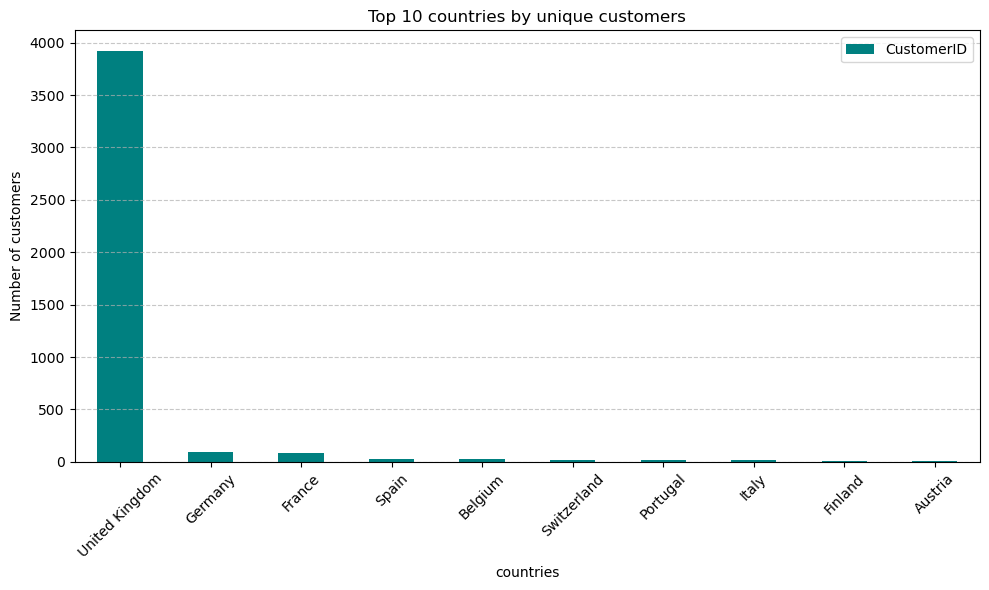

In [75]:
top10_country.plot(kind='bar', color='teal', figsize=(10, 6))

plt.title("Top 10 countries by unique customers")
plt.xlabel("countries")
plt.ylabel("Number of customers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### b-Analysis of sales during the time

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_5260\3945167738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['InvoiceDate'].dt.to_period('M')


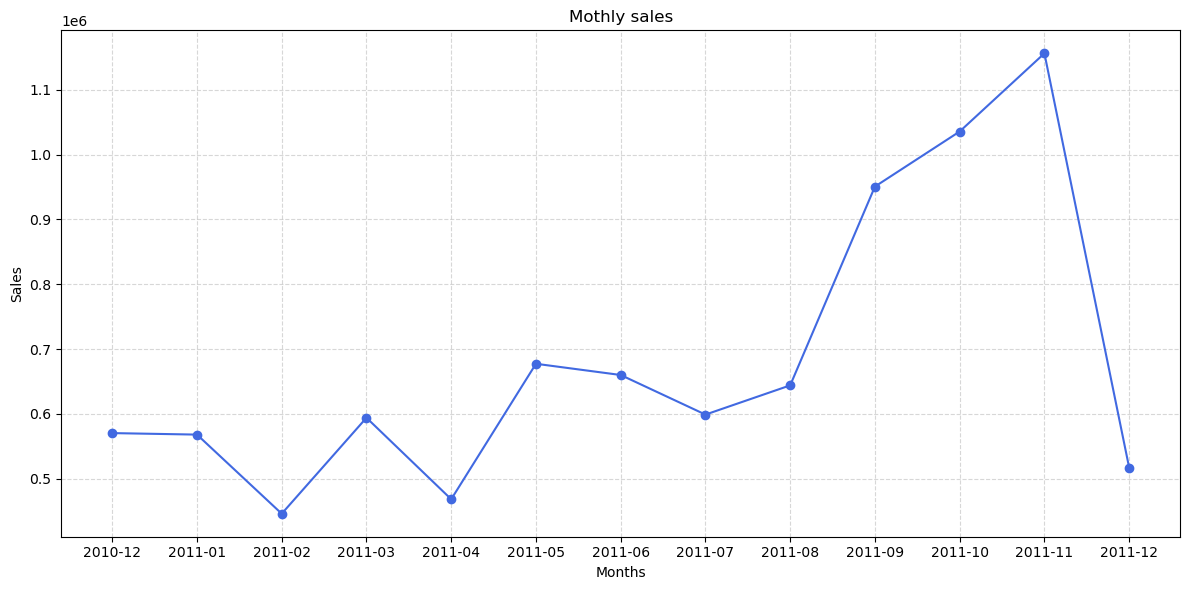

In [87]:
#Create a month column
df['month']=df['InvoiceDate'].dt.to_period('M')

# Calculate the Monthly sales
monthly_sales=df.groupby('month')['total_price'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)


#Plot the line chart
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['month'], monthly_sales['total_price'],marker='o', color='royalblue')
plt.title('Mothly sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
           

#### c-Top sales products

##### i-Top 10 best-selling products by quantity

Description
WHITE HANGING HEART T-LIGHT HOLDER     51
POPCORN HOLDER                         50
RABBIT NIGHT LIGHT                     48
WOODEN HEART CHRISTMAS SCANDINAVIAN    39
JUMBO BAG RED RETROSPOT                39
WOODEN STAR CHRISTMAS SCANDINAVIAN     39
PAPER CHAIN KIT 50'S CHRISTMAS         38
REGENCY CAKESTAND 3 TIER               37
SMALL POPCORN HOLDER                   37
ASSORTED COLOUR BIRD ORNAMENT          37
Name: Quantity, dtype: int64


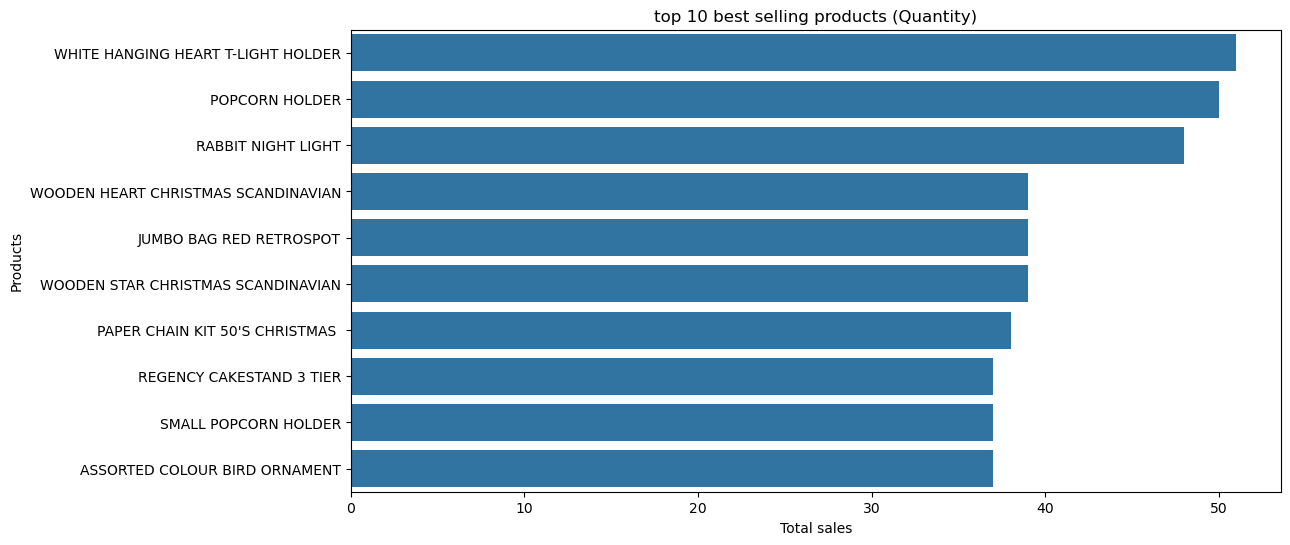

In [92]:
#Table of top 10 best selling products (quantity)

top_products_quantity=(df.groupby('Description')['Quantity']
                                .nunique()
                                .sort_values(ascending=False)
                                .head(10))
print(top_products_quantity)

#Bar plot of top 10 best selling products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products_quantity.values, y=top_products_quantity.index)
plt.title('top 10 best selling products (Quantity)')
plt.xlabel('Total sales')
plt.ylabel('Products')
plt.show()


##### i-Top 10 products generating the most revenue

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: total_price, dtype: float64


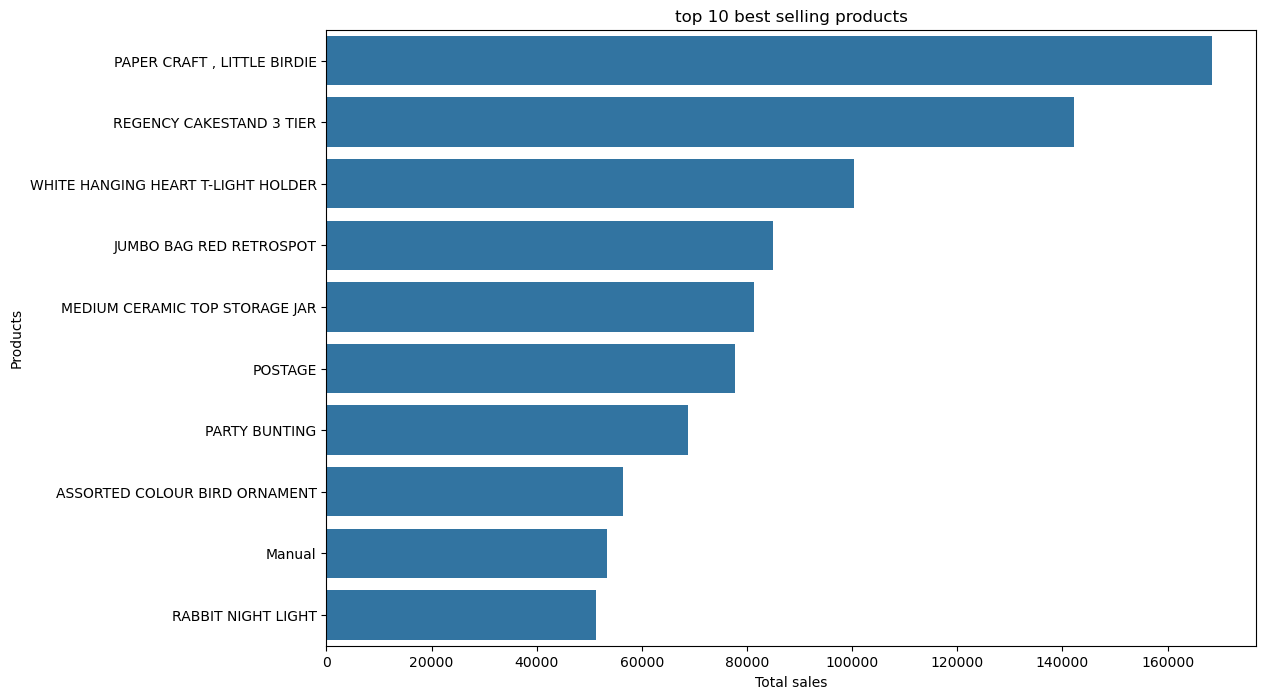

In [95]:
#Table of top 10 best selling products (sales)
top_products_sales=(df.groupby('Description')['total_price']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10))
print(top_products_sales)

#Barplot of top 10 selling products
plt.figure(figsize=(12,8))
sns.barplot(x=top_products_sales.values, y=top_products_sales.index)
plt.title('top 10 best selling products')
plt.xlabel('Total sales')
plt.ylabel('Products')
plt.show()

## II- Feature Engineering with RFM analysis

In [96]:
# Creating a ‘today's date’ the day after the last transaction in our dataset).
last_transaction_date=df['InvoiceDate'].max()
print(last_transaction_date)

#today' s date
snapshot_date = last_transaction_date + dt.timedelta(days=1)
print(snapshot_date)

2011-12-09
2011-12-10


In [99]:
# Creating a new dataframe where each row represent unique customer
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,
    'InvoiceNo': 'nunique',
    'total_price': 'sum'
})

# Renaming columns
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'total_price': 'MonetaryValue'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [100]:
# Statistic description of DataFrame RFM
print("\nStatistic description of DataFrame RFM")
print(rfm_df.describe())


Statistic description of DataFrame RFM
           Recency    Frequency  MonetaryValue
count  4339.000000  4339.000000    4339.000000
mean     93.041484     4.271952    2048.215924
std     100.007757     7.705493    8984.248352
min       1.000000     1.000000       0.000000
25%      18.000000     1.000000     306.455000
50%      51.000000     2.000000     668.560000
75%     142.500000     5.000000    1660.315000
max     374.000000   210.000000  280206.020000


The Max of Recency 374  means that there are customers who have not purchased anything for over a year.The mean of Recency (93) is much higher than the median (50th percentile: 51), indicating an asymmetrical distribution: a majority of customers have purchased fairly recently, but a long tail of customers has been inactive for a long time.

The mean of Frequency (4.2) is higher than the median (50th percentile: 2), which means that most customers buy infrequently, but a few very frequent customers push the mean upwards.

For the Monetary value  The mean (2048) is much higher than the median (50th percentile: 668). This confirms the EDA hypothesis: there are a few ‘big fish’ who spend a lot.

## III- Clustering modelling

### 1-Data preprocessing

#### a- logarithmic transformation of data

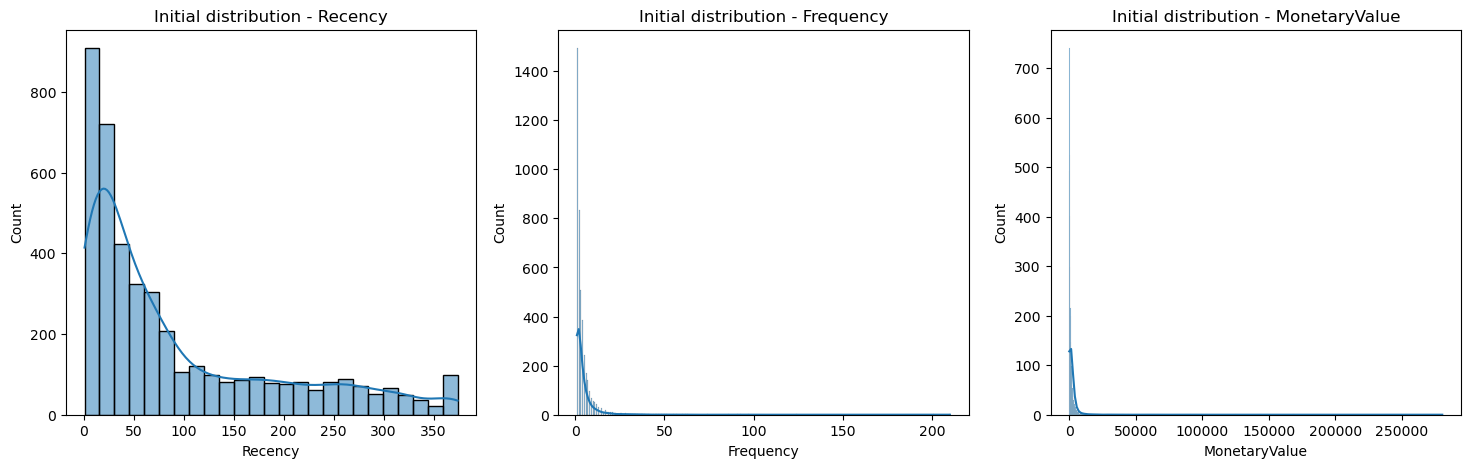

In [103]:
# Data visualization before transformation

fig, axes=plt.subplots(1,3, figsize=(18,5))
sns.histplot(rfm_df['Recency'],ax=axes[0], kde=True).set_title('Initial distribution - Recency')
sns.histplot(rfm_df['Frequency'],ax=axes[1], kde=True).set_title('Initial distribution - Frequency')
sns.histplot(rfm_df['MonetaryValue'],ax=axes[2], kde=True).set_title('Initial distribution - MonetaryValue')
plt.show()

In [106]:
# logarithmic transformation of data
rfm_log=np.log1p(rfm_df)rfm_log.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.386294,2.079442,8.368925
12348.0,4.343805,1.609438,7.494564
12349.0,2.995732,0.693147,7.472245
12350.0,5.743003,0.693147,5.815324


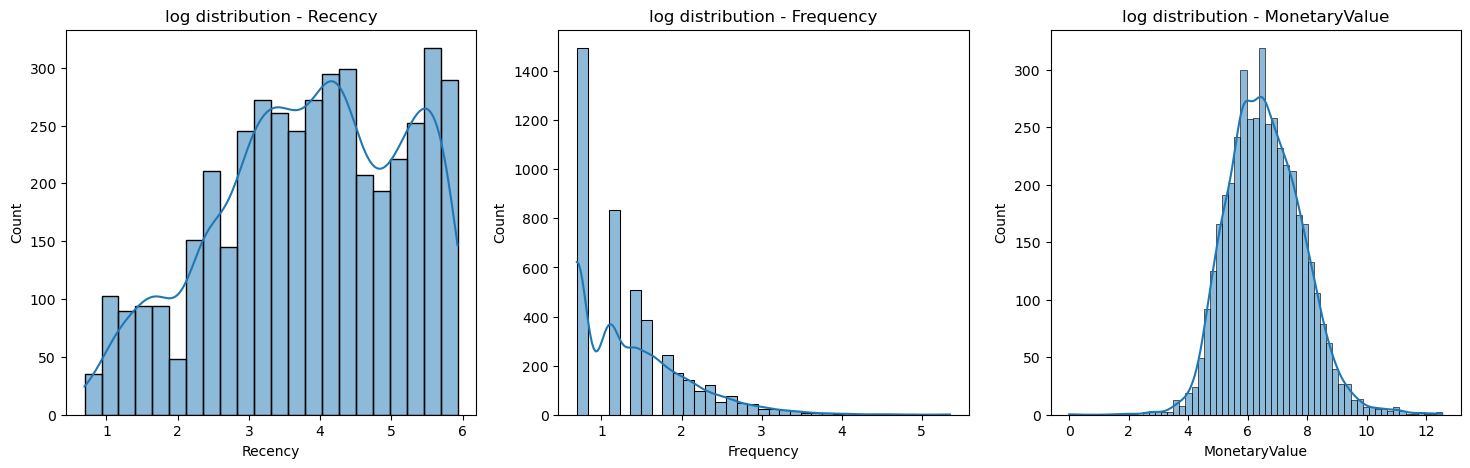

In [107]:
#Visualization of transformed data
fig, axes= plt.subplots(1,3, figsize=(18,5))
sns.histplot(rfm_log['Recency'], ax=axes[0], kde=True).set_title('log distribution - Recency')
sns.histplot(rfm_log['Frequency'],ax=axes[1], kde=True).set_title('log distribution - Frequency')
sns.histplot(rfm_log['MonetaryValue'],ax=axes[2], kde=True).set_title('log distribution - MonetaryValue')
plt.show()


#### b- Scaling Data

In [109]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_log)

#Transorm it into a DataFrame
rfm_scaled_df=pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_df.columns)
rfm_scaled_df.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.479129,-0.955013,3.697687
12347.0,-1.890519,1.074523,1.411820
12348.0,0.372543,0.386437,0.719046
12349.0,-0.658991,-0.955013,0.701362
12350.0,1.443198,-0.955013,-0.611449


### 2- Clustering with K-means algorithm

#### a-Selecting the right number of K

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Selecting the right number of k "clusters" with the elbow method
inertias=[]
silhouettes=[]
K=range(2,10)
for k in K:
    kmeanmodel=KMeans(n_clusters=k, random_state=42)
    kmeanmodel.fit(rfm_scaled_df)
    inertias.append(kmeanmodel.inertia_)
    silhouettes.append(silhouette_score (rfm_scaled_df, kmeanmodel.labels_))

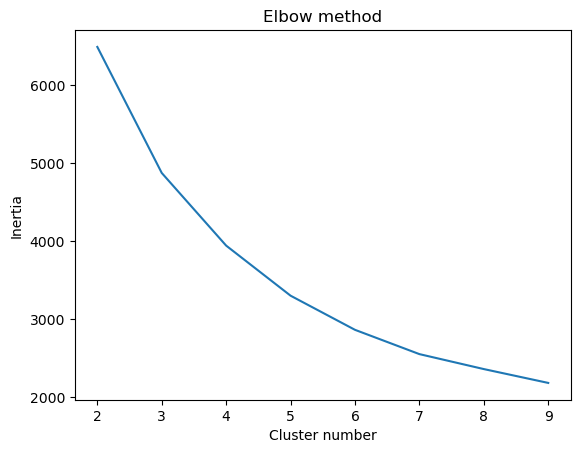

In [116]:
#Inertia curve
plt.plot(range(2,10), inertias)
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

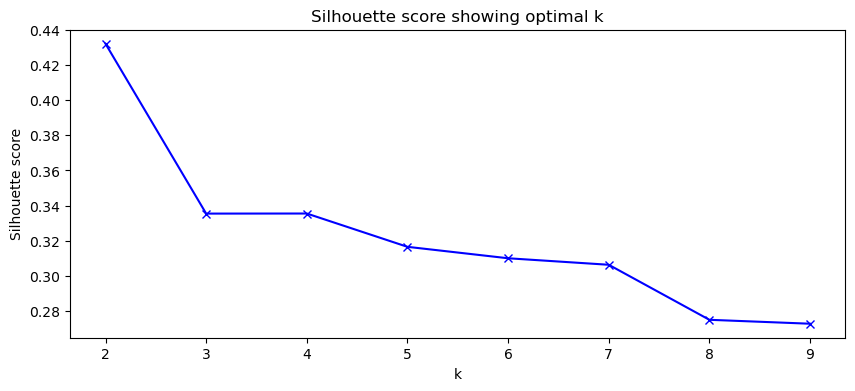

In [118]:
# Silhouette score graph
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score showing optimal k')
plt.show()

We will choose K=4

#### b-K-Means with the optimal K

In [119]:
#Final kmeans model
kmodel=KMeans(n_clusters=4, random_state=42)
kmodel.fit(rfm_scaled_df)

KMeans(n_clusters=4, random_state=42)

In [121]:
#Gather the labels
cluster_labels=kmodel.labels_
rfm_df['cluster']=cluster_labels

print("\nDataFrame RFM final with clusters :")
print(rfm_df.head())
print("\nSize of each cluster :")
print(rfm_df['cluster'].value_counts())


DataFrame RFM final with clusters :
            Recency  Frequency  MonetaryValue  cluster
CustomerID                                            
12346.0         326          1       77183.60        2
12347.0           3          7        4310.00        1
12348.0          76          4        1797.24        2
12349.0          19          1        1757.55        0
12350.0         311          1         334.40        3

Size of each cluster :
cluster
3    1542
2    1185
0     869
1     743
Name: count, dtype: int64


In [122]:
# Saving the data set
rfm_df.to_csv('rfm_with_clusters.csv')

## IV-Segment Analysis and Interpretation

#### 1-Analysis of each cluster

In [123]:
# Cluster summary
cluster_summary=rfm_df.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'cluster': 'count'  
}).rename(columns={'cluster': 'Nb_Clients'}).round(2)

In [124]:
# Percentage of each cluster
cluster_summary['%_Clients'] = (cluster_summary['Nb_Clients'] / cluster_summary['Nb_Clients'].sum() * 100).round(2)

print("\nSummary of clusters 's characteristics :")
print(cluster_summary)


Summary of clusters 's characteristics :
         Recency  Frequency  MonetaryValue  Nb_Clients  %_Clients
cluster                                                          
0          20.48       2.04         519.14         869      20.03
1          12.70      13.43        7839.30         743      17.12
2          72.11       4.02        1765.75        1185      27.31
3         188.73       1.31         336.62        1542      35.54


#### 2- Visualization of each cluster 

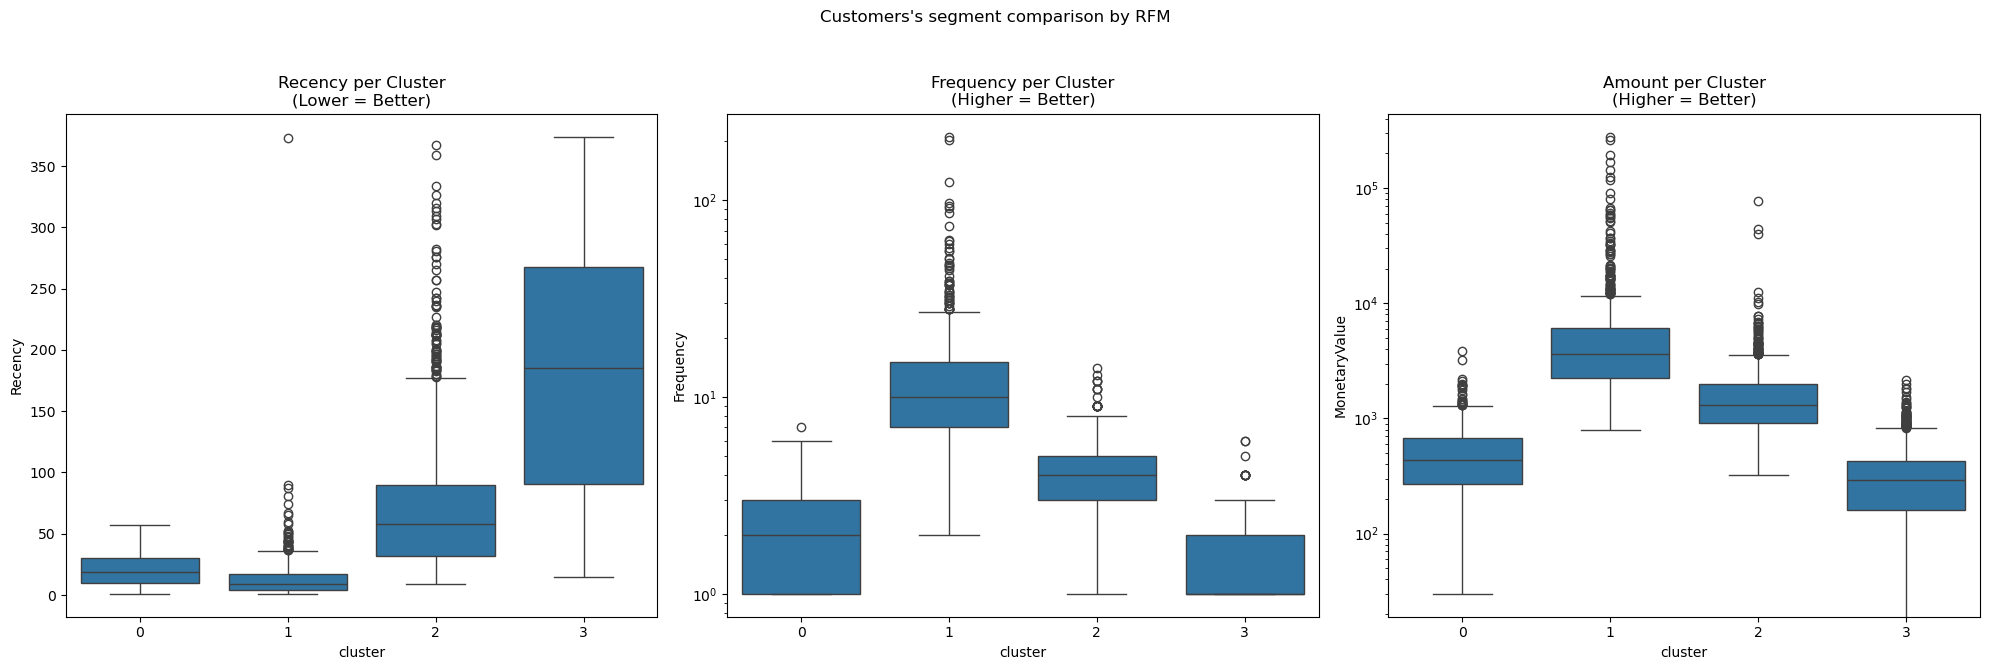

In [126]:
# Ploting box plots for each category
fig, axes=plt.subplots(1, 3, figsize=(20,7))
plt.suptitle("Customers's segment comparison by RFM")

#Recency boxplot
sns.boxplot(ax=axes[0], x='cluster', y='Recency', data=rfm_df)
axes[0].set_title('Recency per Cluster\n(Lower = Better)')

#Frequency boxplot
sns.boxplot(ax=axes[1], x='cluster', y='Frequency', data=rfm_df)
axes[1].set_title('Frequency per Cluster\n(Higher = Better)')
axes[1].set_yscale('log')

#Monetary value boxplot
sns.boxplot(ax=axes[2], x='cluster', y='MonetaryValue', data=rfm_df)
axes[2].set_title('Amount per Cluster\n(Higher = Better)')
axes[2].set_yscale('log') 

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

These graphs visually confirm what the averages were telling us.

### 3-Creation of Personas and Recommendations

In [127]:
# Persona creation
persona_map = {
    0: 'Occasional Customers',
    1: 'Champions',
    2: 'Loyal Customers',
    3: 'Dormant/At-Risk Customers'
}
#Final data frame
rfm_df['persona']=rfm_df['cluster'].map(persona_map)
rfm_df.head()

,Recency,Frequency,MonetaryValue,cluster,persona
CustomerID,,,,,
12346.0,326,1,77183.60,2,Loyal Customers
12347.0,3,7,4310.00,1,Champions
12348.0,76,4,1797.24,2,Loyal Customers
12349.0,19,1,1757.55,0,Occasional Customers
12350.0,311,1,334.40,3,Dormant/At-Risk Customers
